In [55]:
#Import statements
%matplotlib inline

import scipy.stats as st
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math
import scipy


def my_negative_binomial_function(x, r, p):
    nr1 = np.multiply(scipy.special.factorial(x+r-1), 1, dtype=np.float64)
    dr1 = np.multiply(scipy.special.factorial(r-1), 1, dtype=np.float64)
    dr2 = np.multiply(scipy.special.factorial(x), 1, dtype=np.float64)
    nr2 = np.power((1-p),x,dtype=np.float64) * np.power(p,r,dtype=np.float64)
    return ( (nr1/np.multiply(dr1, dr2)) * nr2 )

In [56]:
#funtion
def random_custDist(x0,x1,custDist, r, p,size=None, nControl=10**7):
    samples=[]
    nLoop=0
    while len(samples)<size and nLoop<nControl:
        x=np.random.randint(low=x0,high=x1)
        prop=custDist(x,r,p)
        assert prop>=0 and prop<=1 , str(prop)+" "+str(x)
            
        if np.random.uniform(low=0,high=1) <=prop:
            samples += [x]
        nLoop+=1
    return np.sort(samples)

Theoretical Mean: 10.111111111111112
Theoretical Variance: 112.34567901234568


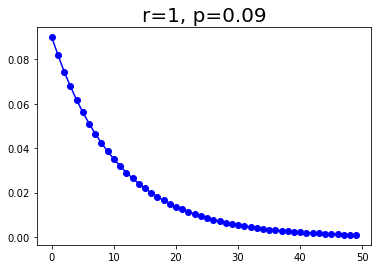

In [57]:
r1 = 1
p1 = 0.09

x_values_1 = np.arange (0, 50, 1) 

negBin_values_1 = my_negative_binomial_function(x_values_1,r1,p1) 

print("Theoretical Mean:",(r1*(1-p1)/p1))
print("Theoretical Variance:",(r1*(1-p1)/(p1*p1)))

plt.plot(x_values_1,negBin_values_1,marker='o', color='b')

plt.title(r'r=1, p=0.09',fontsize=20)
plt.savefig("./NegBinom/dist_1.png")

mean 11.1123
variance 112.89808871000001


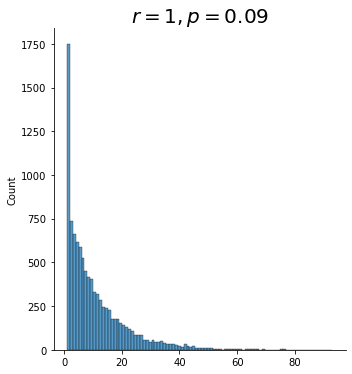

In [26]:
sample_1 = random_custDist(1, 165, my_negative_binomial_function, r1, p1, size=10000, nControl=10**7)

print("mean",np.mean(sample_1))
print("variance",np.var(sample_1))

sns.displot(sample_1)

plt.title(r'$ r=1, p=0.09  $',fontsize=20)
plt.savefig("./NegBinom/dist_sample_1.png")

Theoretical Mean: 20.222222222222225
Theoretical Variance: 224.69135802469137


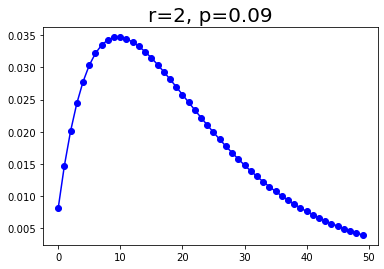

In [28]:
r2 = 2
p2 = 0.09

x_values_2 = np.arange (0, 50, 1) 

negBin_values_2 = my_negative_binomial_function(x_values_2,r2,p2) 

print("Theoretical Mean:",(r2*(1-p2)/p2))
print("Theoretical Variance:",(r2*(1-p2)/(p2*p2)))

plt.plot(x_values_2,negBin_values_2,marker='o', color='b')

plt.title(r'r=2, p=0.09',fontsize=20)
plt.savefig("./NegBinom/dist_2.png")

mean 20.3401
variance 225.43543199


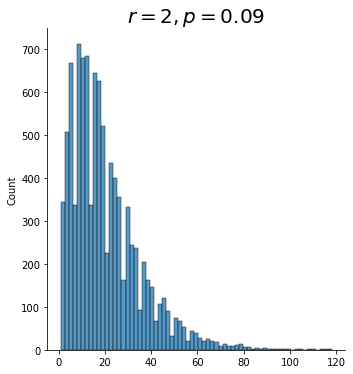

In [29]:
sample_2 = random_custDist(1, 165, my_negative_binomial_function, r2, p2, size=10000, nControl=10**7)

print("mean",np.mean(sample_2))
print("variance",np.var(sample_2))

sns.displot(sample_2)

plt.title(r'$ r=2, p=0.09  $',fontsize=20)
plt.savefig("./NegBinom/dist_sample_2.png")

Theoretical Mean: 40.44444444444445
Theoretical Variance: 449.38271604938274


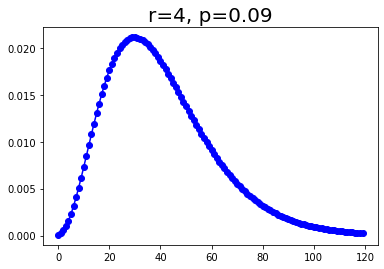

In [64]:
r3 = 4
p3 = 0.09

x_values_3 = np.arange (0, 120, 1) 

negBin_values_3 = my_negative_binomial_function(x_values_3,r3,p3) 

print("Theoretical Mean:",(r3*(1-p3)/p3))
print("Theoretical Variance:",(r3*(1-p3)/(p3*p3)))

plt.plot(x_values_3,negBin_values_3,marker='o', color='b')

plt.title(r'r=4, p=0.09',fontsize=20)
plt.savefig("./NegBinom/dist_3.png")

mean 40.2735
variance 452.8992977500001


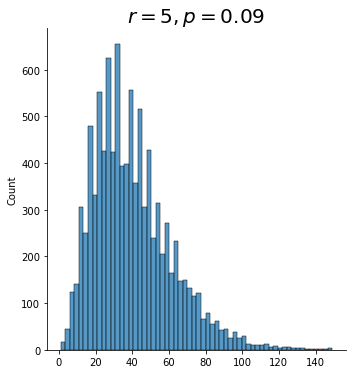

In [65]:
sample_3 = random_custDist(1, 150, my_negative_binomial_function, r3, p3, size=10000, nControl=10**7)

print("mean",np.mean(sample_3))
print("variance",np.var(sample_3))

sns.displot(sample_3)

plt.title(r'$ r=5, p=0.09  $',fontsize=20)
plt.savefig("./NegBinom/dist_sample_3.png")

## CENTRAL LIMIT THEOREM

In [66]:
# Here Let the shape parameters be r and p

r = 1
p = 0.09

sample_means=[]

n=40

for i in range(0,1000):
    sample = random_custDist(0,125,my_negative_binomial_function,r,p,size=40, nControl=10**7)
    
    sample_mean = np.mean(sample)
    
    sample_means.append(sample_mean)
    
# print(sample_means)

mean 10.101975
variance 2.752072974375


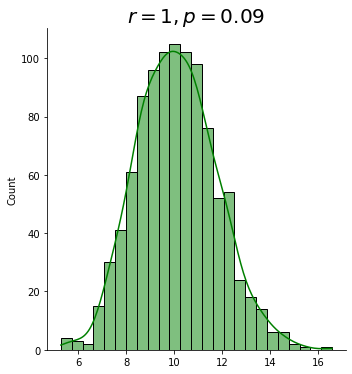

In [69]:
sns.displot(sample_means,kde="true",color="g")

print("mean",np.mean(sample_means))
print("variance",np.var(sample_means))

plt.title(r'$ r=1, p=0.09  $',fontsize=20)
plt.savefig("./NegBinom/dist_sample_clt.png")

In [70]:
print("expected mean",(r*(1-p)/p),"........................","mean",np.mean(sample_means))
print("expected variance",(r*(1-p)/(p*p))/40,"........................","variance",np.var(sample_means))

expected mean 10.111111111111112 ........................ mean 10.101975
expected variance 2.808641975308642 ........................ variance 2.752072974375
